In [56]:
import yfinance as yf
import numpy as np 
import matplotlib.pyplot as plt


[*********************100%***********************]  1 of 1 completed


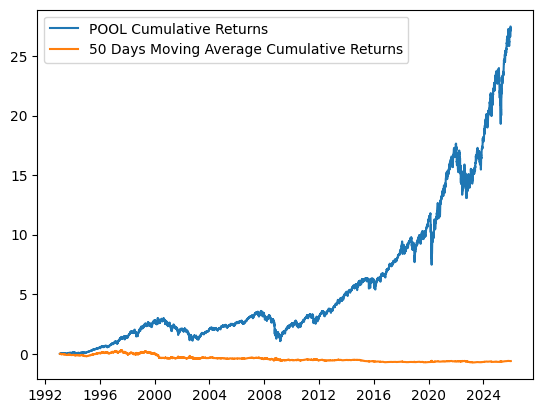

In [59]:
Ticker = "POOL" #Change the ticker here too to add it to the chart
Window = 50 #Choose the window you want to look at

def get_data():
    df = yf.download(Ticker)
    df = ticker.history(period="max") 
    df.columns = df.columns.get_level_values(0)
    df['Moving Average'] = df["Close"].rolling(Window).mean()
    return df

def add_strategy(df):
    df.columns = df.columns.get_level_values(0)
    df["Strategy"] = np.where(df["Close"] > df["Moving Average"], 1, -1) #This is to determine if we should go short or long on the stock
    df["Strategy"] = df["Strategy"].shift(1) #Yesterday's closing price will determine the strategy today, which is why we are shifting by 1. 
    return df

def test_strategy(df):
    df["Assets Cumulative"] = np.cumprod(1 + df["Close"].pct_change()) - 1 #Shows (1 + each day's % change)! We then - 1 to show the total gain/loss
    df["Strategy Cumulative"] = np.cumprod(1 + df["Close"].pct_change() * df["Strategy"])  - 1 #Same as above but multiplied to your signal
    return df

def main():
    df = get_data()
    df = add_strategy(df) 
    df = test_strategy(df)

    plt.plot(df["Assets Cumulative"])
    plt.plot(df["Strategy Cumulative"])
    plt.legend([f"{Ticker} Cumulative Returns", f"{Window} Days Moving Average Cumulative Returns"])
    
main()    